<a href="https://colab.research.google.com/github/Nadaramadan1/PythonProject/blob/main/Nada_Ramadan_Clusting_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Country-data - Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [484]:
data.drop(['country'],axis=1,inplace=True)

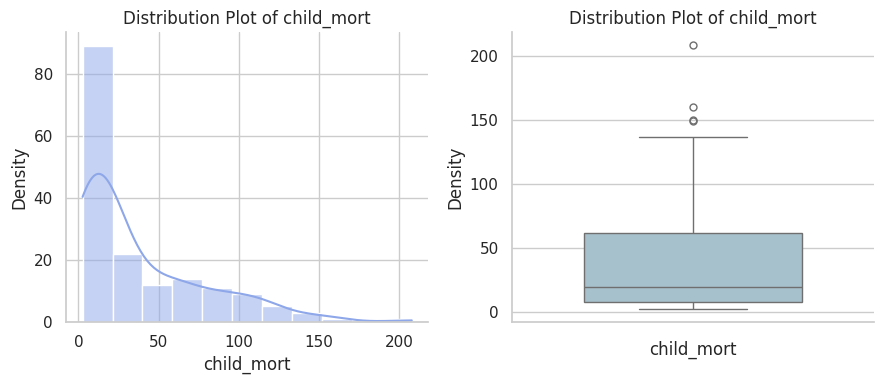

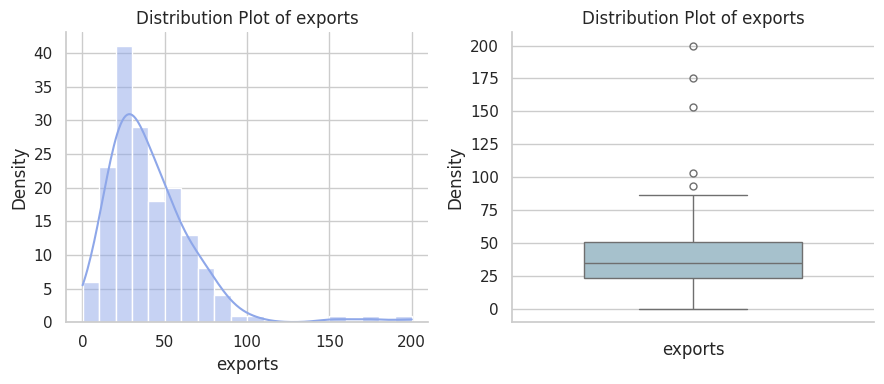

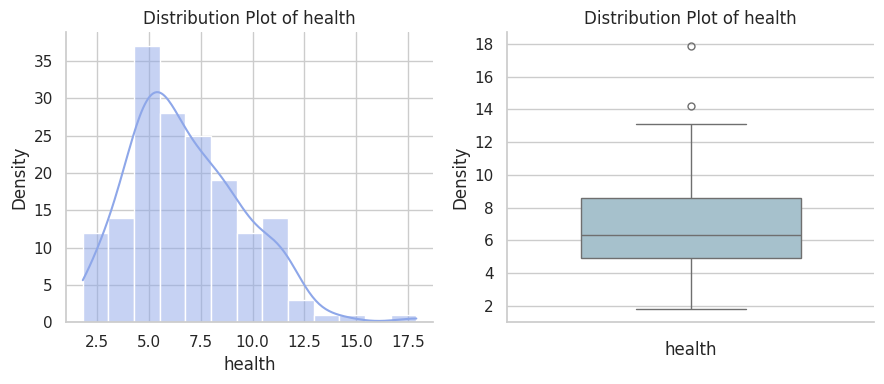

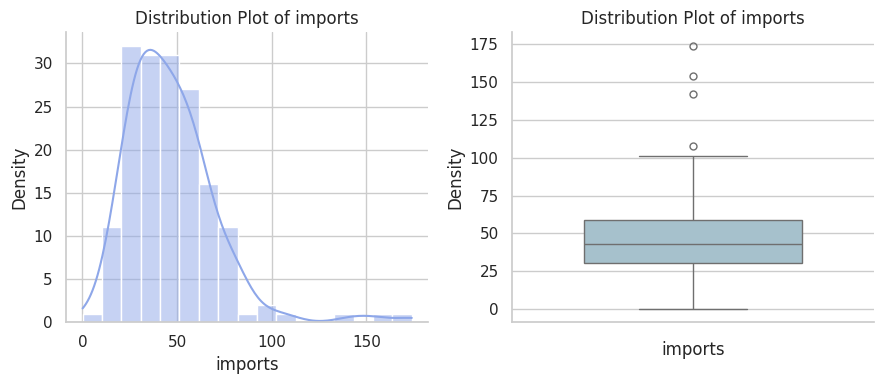

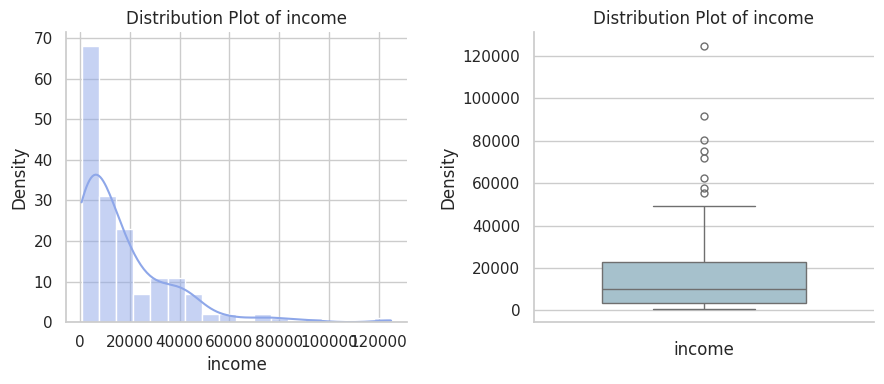

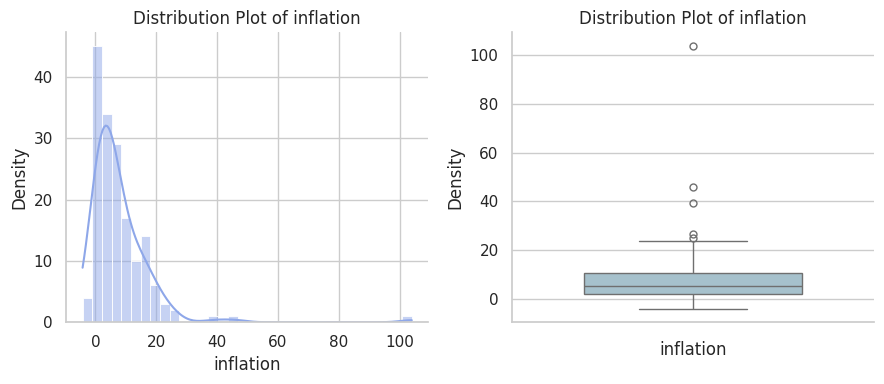

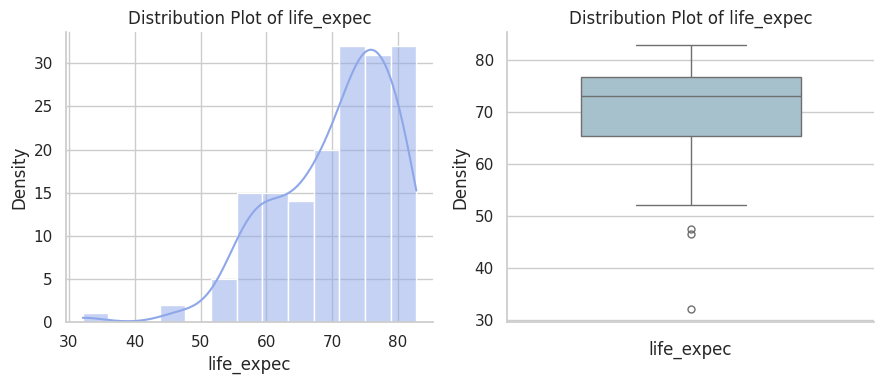

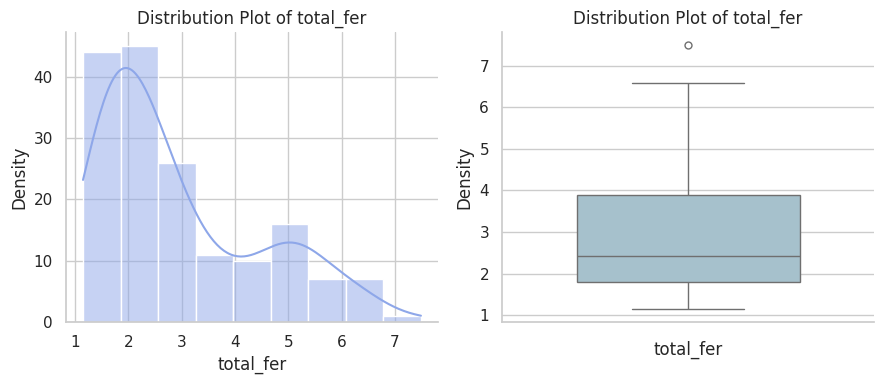

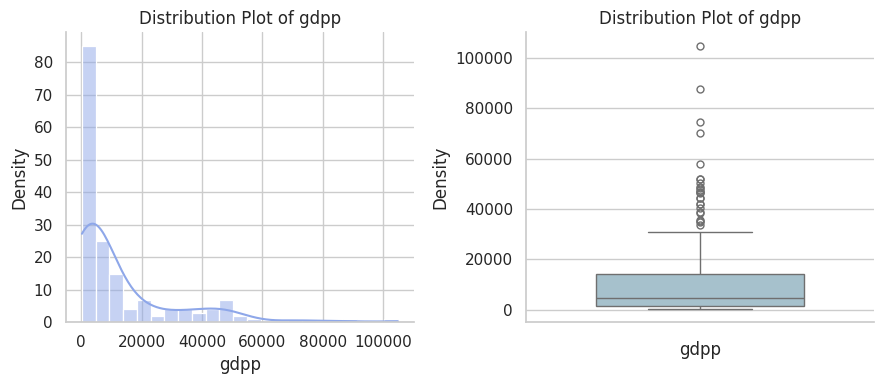

In [485]:
numerical_col = data.columns
for i in range(len(numerical_col)):
    plt.figure(figsize=(9,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_col[i]],kde=True,color='#8EA7E9')
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.subplot(1, 2, 2)
    sns.boxplot(data[numerical_col[i]],color='#A0C3D2',width=0.6, fliersize=5)
    plt.xlabel(numerical_col[i])
    plt.ylabel('Density')
    plt.title(f'Distribution Plot of {numerical_col[i]}')
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
plt.show()

In [486]:
numerical_cols = data.select_dtypes(include=np.number).columns

outliers_dict = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    outliers_dict[col] = outliers

    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")

Column: child_mort
  Q1: 8.25
  Q3: 62.10
  IQR: 53.85
  Lower Bound: -72.53
  Upper Bound: 142.88
  Number of outliers: 4
Column: exports
  Q1: 23.80
  Q3: 51.35
  IQR: 27.55
  Lower Bound: -17.52
  Upper Bound: 92.67
  Number of outliers: 5
Column: health
  Q1: 4.92
  Q3: 8.60
  IQR: 3.68
  Lower Bound: -0.60
  Upper Bound: 14.12
  Number of outliers: 2
Column: imports
  Q1: 30.20
  Q3: 58.75
  IQR: 28.55
  Lower Bound: -12.63
  Upper Bound: 101.58
  Number of outliers: 4
Column: income
  Q1: 3355.00
  Q3: 22800.00
  IQR: 19445.00
  Lower Bound: -25812.50
  Upper Bound: 51967.50
  Number of outliers: 8
Column: inflation
  Q1: 1.81
  Q3: 10.75
  IQR: 8.94
  Lower Bound: -11.60
  Upper Bound: 24.16
  Number of outliers: 5
Column: life_expec
  Q1: 65.30
  Q3: 76.80
  IQR: 11.50
  Lower Bound: 48.05
  Upper Bound: 94.05
  Number of outliers: 3
Column: total_fer
  Q1: 1.79
  Q3: 3.88
  IQR: 2.08
  Lower Bound: -1.33
  Upper Bound: 7.01
  Number of outliers: 1
Column: gdpp
  Q1: 1330.00
  

In [487]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

cleaned_data = remove_outliers(data.copy())


In [488]:
# Feature Engineering: Create new ratio features
data['exports_to_income'] = data['exports'] / data['income']
data['health_to_income'] = data['health'] / data['income']
data['imports_to_gdpp'] = data['imports'] / data['gdpp']

# Handle infinities and NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)


# Feature Scaling

In [489]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# DBSCAN algorithm

In [490]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=1,min_samples=10)
y_dbscan=dbscan.fit(x_2D)

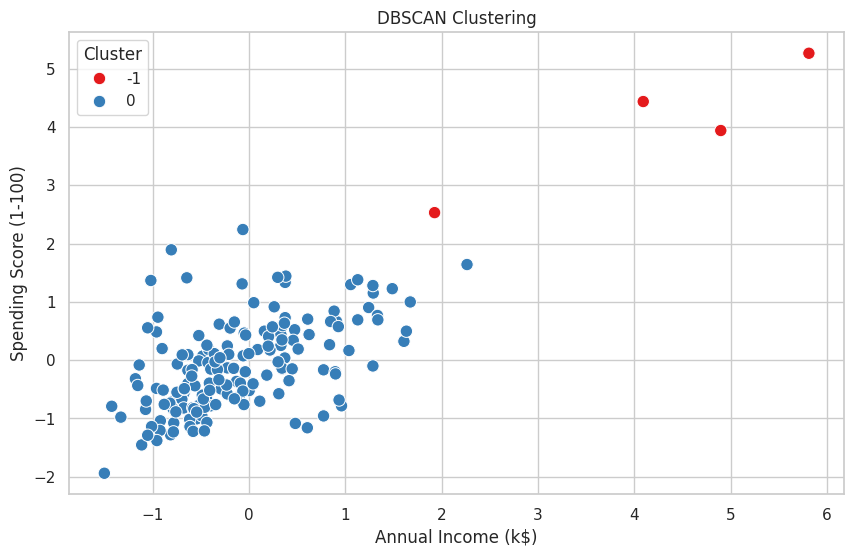

In [491]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_2D[:, 0], y=x_2D[:, 1], hue=y_dbscan.labels_, palette='Set1', s=80)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [492]:
silhouette_avg = silhouette_score(x_2D, y_dbscan.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.765647358006538


# Agglomerative algorithm

In [493]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_pca)

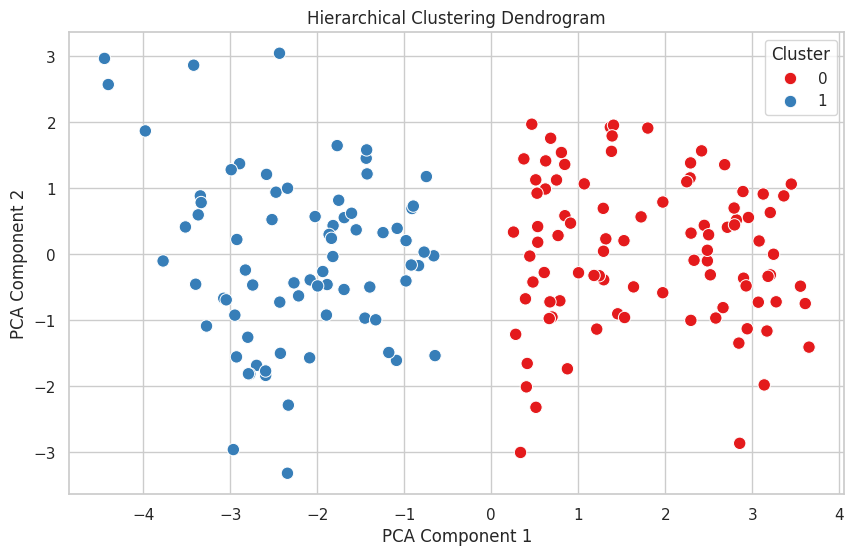

In [494]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_hc, palette='Set1', s=80)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [495]:
silhouette_avg = silhouette_score(x_pca, y_hc)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5331714109482997


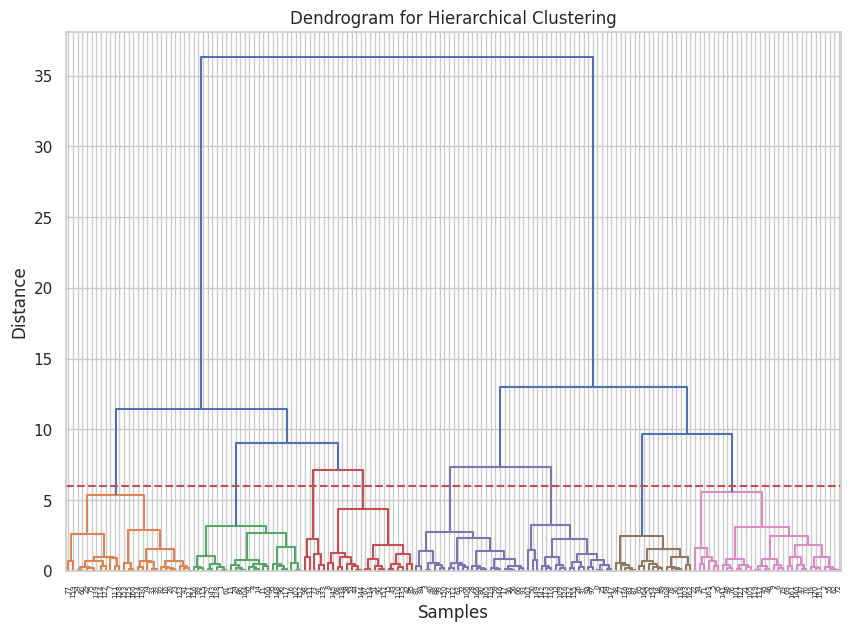

In [496]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(x_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,color_threshold=7.5)
plt.axhline(y=6, color='r', linestyle='--')
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# PCA dimensionality reduction

In [497]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_2D=data.iloc[:,:]
sc = StandardScaler()
x_2D = sc.fit_transform(x_2D)

In [498]:
pca = PCA(n_components=2)
x_2D = pca.fit_transform(x_2D)

In [500]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
wcss=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)

# K_Means algorithm

In [501]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

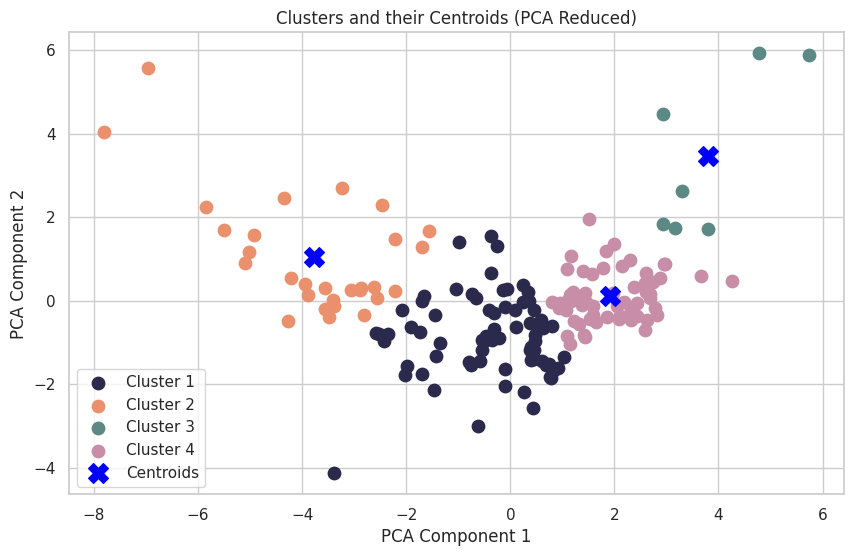

In [502]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')
plt.scatter(x_2D[y == 3, 0], x_2D[y == 3, 1], s=80, c='#C88EA7', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[1:5, 0], kmeans.cluster_centers_[1:5, 1],s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [503]:
x_2D=data.iloc[:,[1,3]]
x_2D=sc.fit_transform(x_2D)

In [504]:
silhouette_scores = []
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_2D)
  wcss.append(kmeans.inertia_)
  if i > 1:
        score = silhouette_score(x_2D, kmeans.labels_)
        silhouette_scores.append(score)

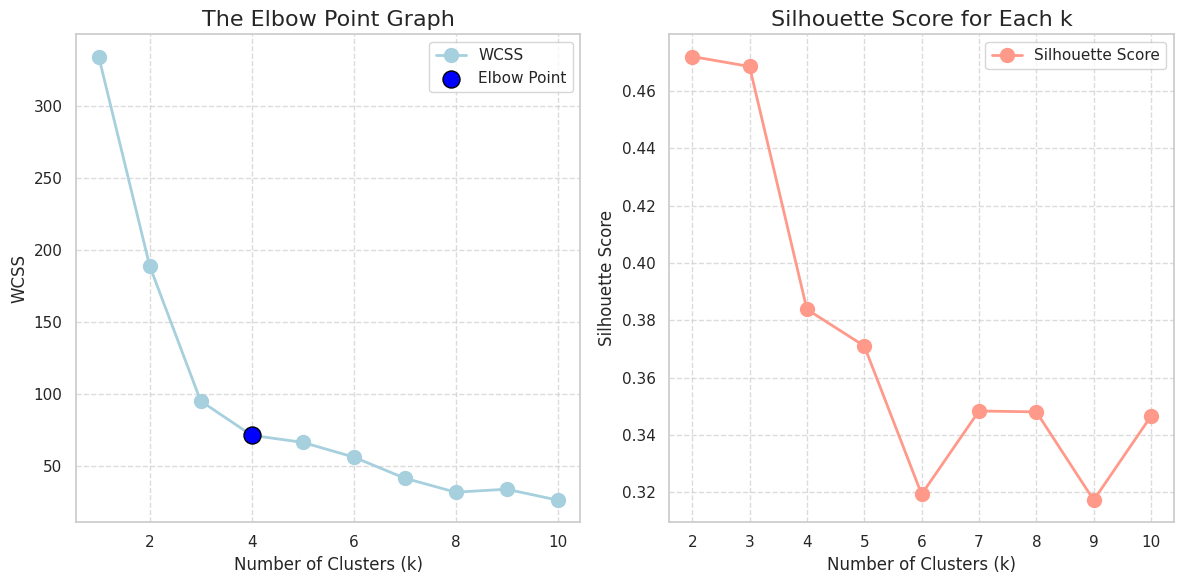

In [505]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD',
         markersize=10, linewidth=2, label='WCSS')
plt.title('The Elbow Point Graph', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)

elbow_point = 4

plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='#FF9A8B',
         markersize=10, linewidth=2, label='Silhouette Score')
plt.title('Silhouette Score for Each k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [506]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y=kmeans.fit_predict(x_2D)

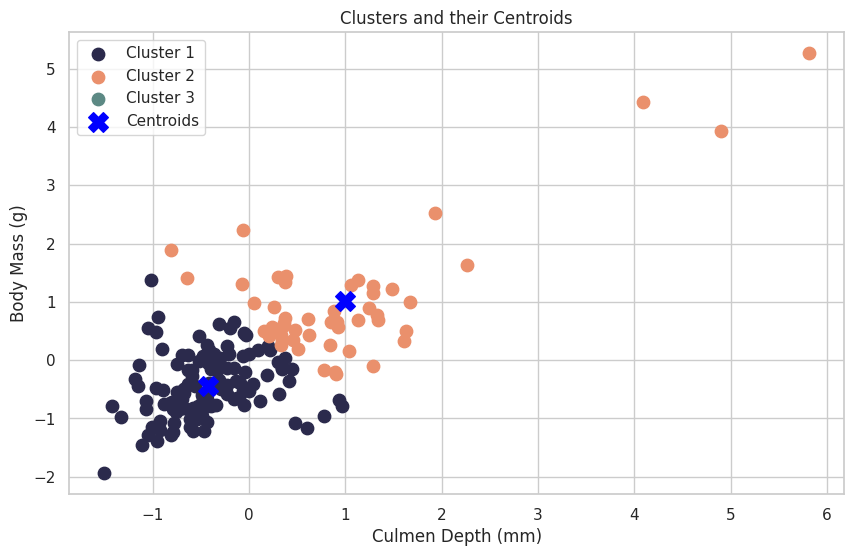

In [507]:
plt.figure(figsize=(10, 6))
plt.scatter(x_2D[y == 0, 0], x_2D[y == 0, 1], s=80, c='#2B2A4C', label='Cluster 1')
plt.scatter(x_2D[y == 1, 0], x_2D[y == 1, 1], s=80, c='#EA906C', label='Cluster 2')
plt.scatter(x_2D[y == 2, 0], x_2D[y == 2, 1], s=80, c='#5C8984', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='blue', marker='X', label='Centroids')

plt.title('Clusters and their Centroids')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.grid(True)
plt.show()

In [508]:
silhouette_avg = silhouette_score(x_2D, y)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4721003147469479


In [518]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import pandas as pd

# Set up an empty list to collect results
results = []

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan_labels = dbscan.fit_predict(x_2D)
if len(set(dbscan_labels)) > 1:  # Silhouette score needs at least 2 clusters
    dbscan_score = silhouette_score(x_2D, dbscan_labels)
    results.append({'Algorithm': 'DBSCAN', 'Clusters': len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0), 'Silhouette Score': dbscan_score})

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(x_pca)
agglo_score = silhouette_score(x_pca, agglo_labels)
results.append({'Algorithm': 'Agglomerative', 'Clusters': len(set(agglo_labels)), 'Silhouette Score': agglo_score})

# KMeans (try multiple clusters and pick best silhouette)
for k in range(2, 6):  # Adjust range based on your use case
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(x_2D)
    score = silhouette_score(x_2D, kmeans_labels)
    results.append({'Algorithm': f'KMeans (k={k})', 'Clusters': k, 'Silhouette Score': score})

# Create DataFrame summary
summary_df = pd.DataFrame(results)
print(summary_df)


       Algorithm  Clusters  Silhouette Score
0         DBSCAN         1          0.765647
1  Agglomerative         2          0.533171
2   KMeans (k=2)         2          0.472100
3   KMeans (k=3)         3          0.468620
4   KMeans (k=4)         4          0.383822
5   KMeans (k=5)         5          0.371041


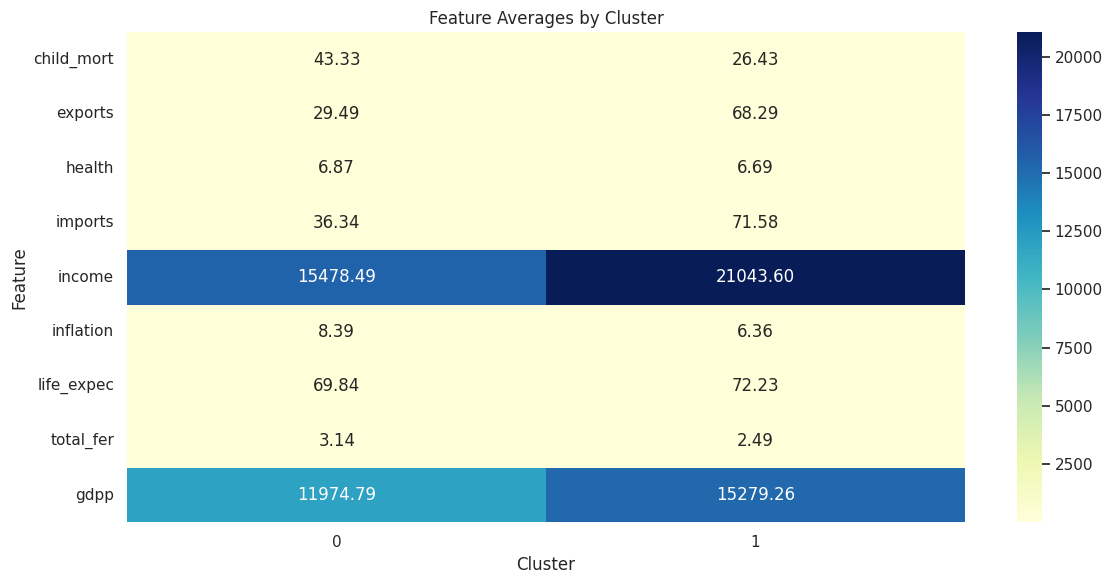

In [517]:
numeric_clustered_data = clustered_data.select_dtypes(include=np.number)


heatmap_data = numeric_clustered_data.groupby(clustered_data['Cluster']).mean().round(2)


if 'Cluster' in heatmap_data.columns:
    heatmap_data = heatmap_data.drop('Cluster', axis=1)


plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Averages by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [516]:
# Map numeric cluster labels to more intuitive names
clustered_data['Cluster_Label'] = clustered_data['Cluster'].map({0: 'Developing', 1: 'Developed'})

# Now show the updated summary
cluster_summary_named = clustered_data.groupby('Cluster_Label').mean().round(2)
display(cluster_summary_named)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
Cluster_Label,,,,,,,,,,
Developed,26.43,68.29,6.69,71.58,21043.60,6.36,72.23,2.49,15279.26,1.0
Developing,43.33,29.49,6.87,36.34,15478.49,8.39,69.84,3.14,11974.79,0.0


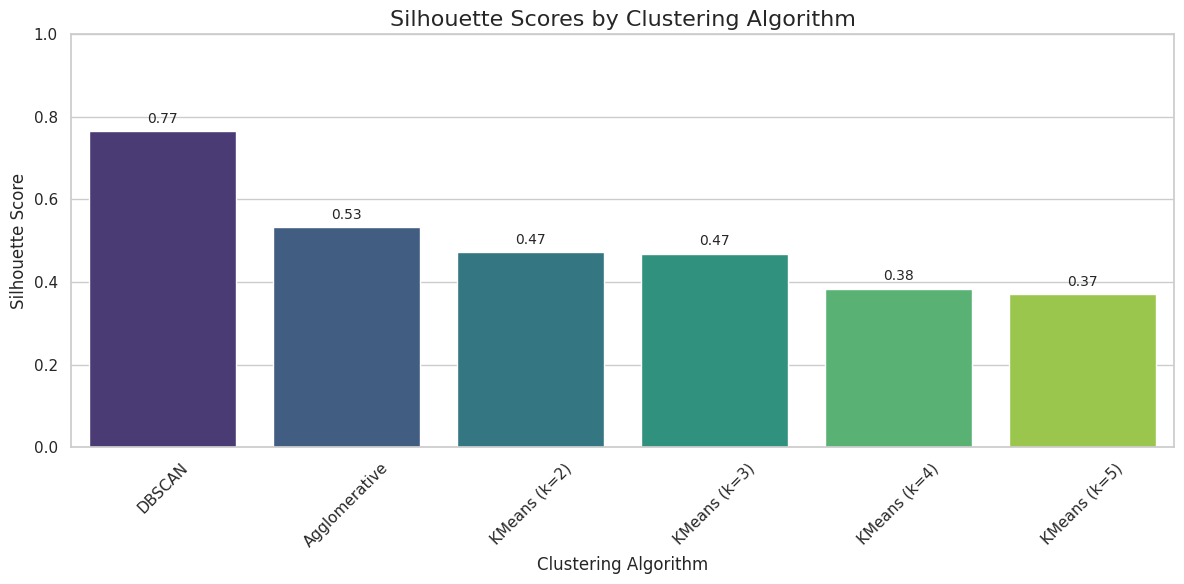

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot from your summary_df
plt.figure(figsize=(12, 6))
sns.barplot(x="Algorithm", y="Silhouette Score", data=summary_df, palette="viridis")

# Title and labels
plt.title("Silhouette Scores by Clustering Algorithm", fontsize=16)
plt.xlabel("Clustering Algorithm", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels on top of bars
for index, row in summary_df.iterrows():
    plt.text(index, row["Silhouette Score"] + 0.02, f'{row["Silhouette Score"]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
